In [1]:
%matplotlib inline
import altair as alt
import pandas as pd
import numpy as np
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
data = pd.read_csv('abalone.data', names=['Sex','Length',
                                        'Diameter','Height',
                                        'Whole_weight', 'Shucked_weight', 
                                        'Viscera_weight', 'Shell_weight', 
                                        'Rings'])

In [3]:
brush = alt.selection(type='interval')

ratings = ['M', 'F', 'I']

rating_radio = alt.binding_radio(options=ratings)

rating_select = alt.selection_single(fields=['Sex'], bind=rating_radio, name="Sex")
sex_color_condition = alt.condition(rating_select,
                      alt.Color('Sex:N', legend=None),
                      alt.value('lightgray'))


In [4]:
# Main Chart
# the top scatterplot
height_length_scatter = alt.Chart(title='Height + Length').mark_point(filled = True).encode(
    x='Length:Q',
    y='Height:Q',
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray')),  
).properties(
    selection=brush,
    width=650,
    
).add_selection(
    rating_select
).encode(
    color=sex_color_condition,
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
)

x = data.Length
y = data.Height
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})
for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

# Plot the best fit polynomials
height_length_polynomial_fit = alt.Chart(poly_data).transform_fold(
    ['1'],
    as_=['degree', 'yfit']
).mark_line().encode(
    x='xfit:Q',
    y='yfit:Q',
    color=alt.value('black')
)


In [5]:
# the right Category Bar Chart
sex_chart = alt.Chart(title='Sex Total').mark_bar().encode(
    y='count()',
    color='Sex:N',
    x='Sex:N'
).transform_filter(
    brush.ref()
).encode(
    color=sex_color_condition
).properties(
    width=200
)

sex_text = sex_chart.mark_text(
    align='left',
    baseline='middle',
    dy=-5 # Nudges text to the right so it doesn't appear on the top of the bar.
).encode(
    text='count()'
)

In [6]:
no_of_rings = alt.Chart(title='Count of Rings').mark_bar().encode(
    x='mean(Rings)',
    y='Sex:N',
    color='Sex:N',
).transform_filter(
    brush.ref()
).properties(
    width = 850, 
    #height = 150
).encode(
    color=sex_color_condition
)

ring_text = no_of_rings.mark_text(
    align='left',
    baseline='middle',
    dx=3 # Nudges text to the right so it doesn't appear on the top of the bar.
).encode(
    text='count()'
)

In [7]:
length_ring_scatter = alt.Chart().mark_point().encode(
    x='Length:Q',
    y='Rings:Q',
    color='Sex:N',
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=sex_color_condition
).interactive()


x = data.Length
y = data.Rings
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})
for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

# Plot the best fit polynomials
rings_length_polynomial_fit = alt.Chart(poly_data).transform_fold(
    ['1'],
    as_=['degree', 'yfit']
).mark_line().encode(
    x='xfit:Q',
    y='yfit:Q',
    color=alt.value('black')
)



In [8]:
height_ring_scatter = alt.Chart().mark_point().encode(
    x='Height:Q',
    y='Rings:Q',
    color='Sex:N',
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=sex_color_condition
).interactive()

x = data.Height
y = data.Rings
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})
for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

# Plot the best fit polynomials
rings_height_polynomial_fit = alt.Chart(poly_data).transform_fold(
    ['1'],
    as_=['degree', 'yfit']
).mark_line().encode(
    x='xfit:Q',
    y='yfit:Q',
    color=alt.value('black')
)


In [9]:
shell_shellweight_scatter = alt.Chart().mark_point().encode(
    x='Shell_weight:Q', 
    y='Rings:Q',
    color='Sex:N',
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=sex_color_condition
).interactive()

x = data.Shell_weight
y = data.Rings
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})
for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

# Plot the best fit polynomials
rings_shellweight_polynomial_fit = alt.Chart(poly_data).transform_fold(
    ['1'],
    as_=['degree', 'yfit']
).mark_line().encode(
    x='xfit:Q',
    y='yfit:Q',
    color=alt.value('black')
)


In [10]:
rings_wholeweight_scatter = alt.Chart().mark_point().encode(
    y='Rings:Q', 
    x='Whole_weight:Q',
    color='Sex:N',
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=sex_color_condition
).interactive()

x = data.Whole_weight
y = data.Rings
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})
for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

# Plot the best fit polynomials
rings_wholeshellweight_polynomial_fit = alt.Chart(poly_data).transform_fold(
    ['1'],
    as_=['degree', 'yfit']
).mark_line().encode(
    x='xfit:Q',
    y='yfit:Q',
    color=alt.value('black')
)

In [11]:
rings_shuckedweight_scatter = alt.Chart().mark_point().encode(
    y='Rings:Q', 
    x='Shucked_weight:Q',
    color='Sex:N',
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=sex_color_condition
).interactive()

x = data.Shucked_weight
y = data.Rings
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})
for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

# Plot the best fit polynomials
rings_Shuckedshellweight_polynomial_fit = alt.Chart(poly_data).transform_fold(
    ['1'],
    as_=['degree', 'yfit']
).mark_line().encode(
    x='xfit:Q',
    y='yfit:Q',
    color=alt.value('black')
)

In [18]:
rings_visceraweight_scatter = alt.Chart().mark_point().encode(
    y='Rings:Q', 
    x='Viscera_weight:Q',
    color='Sex:N',
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=sex_color_condition
).interactive()

x = data.Viscera_weight
y = data.Rings
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})
for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

# Plot the best fit polynomials
rings_Viscerashellweight_polynomial_fit = alt.Chart(poly_data).transform_fold(
    ['1'],
    as_=['degree', 'yfit']
).mark_line().encode(
    x='xfit:Q',
    y='yfit:Q',
    color=alt.value('black')
)

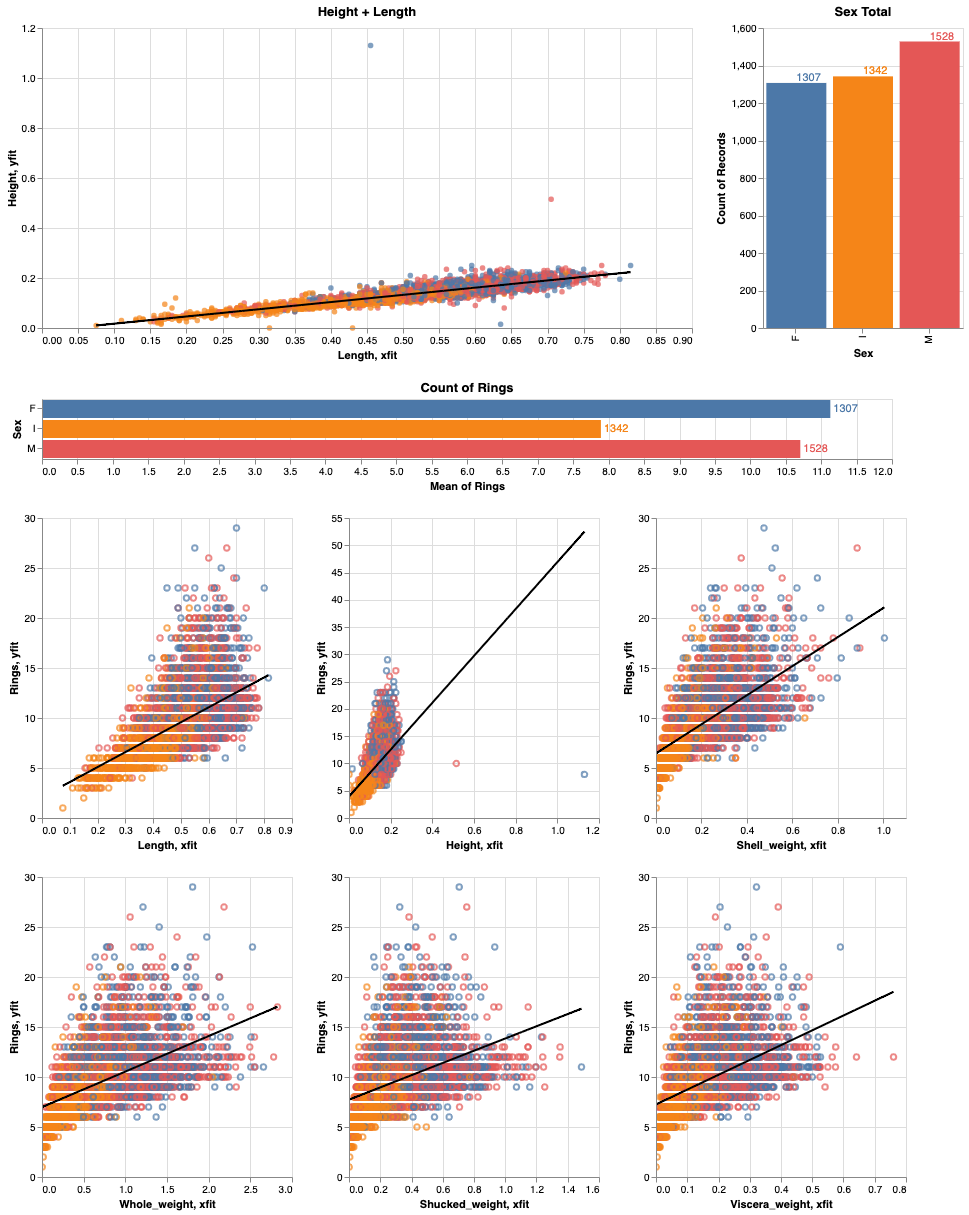

In [19]:
#Display Chart

chart = alt.vconcat((height_length_scatter + height_length_polynomial_fit) | (sex_chart + sex_text), 
                    (no_of_rings + ring_text), 
                    (length_ring_scatter + rings_length_polynomial_fit) | (height_ring_scatter + rings_height_polynomial_fit) 
                    | (shell_shellweight_scatter + rings_shellweight_polynomial_fit),
                    (rings_wholeweight_scatter + rings_wholeshellweight_polynomial_fit)|(rings_shuckedweight_scatter + rings_Shuckedshellweight_polynomial_fit)| (rings_visceraweight_scatter + rings_Viscerashellweight_polynomial_fit) ,
                    data=data)
chart